In [1]:
# batch test


import pickle, json, copy, cv2
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
## read saved pickle of parsed annotations
with open ('val_imgs', 'rb') as fp:
    val_imgs = pickle.load(fp)

## read saved pickle of parsed annotations
with open ('train_imgs', 'rb') as fp:
    train_imgs = pickle.load(fp)

{'width': 640, 'object': [{'ymax': 529, 'box_height': 145, 'box_width': 290, 'xmax': 412, 'xmin': 122, 'ymin': 384, 'name': '1'}, {'ymax': 466, 'box_height': 207, 'box_width': 414, 'xmax': 480, 'xmin': 66, 'ymin': 259, 'name': '1'}], 'filename': 'data/depth/seq0_0000_1.pgm', 'height': 480}


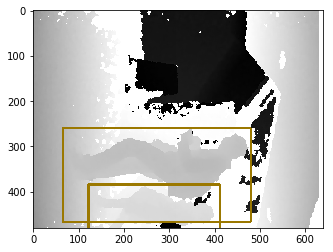

In [3]:
def draw_boxes(ann):
    
    img = cv2.imread(ann['filename'])


#     image_h, image_w, _ = img.shape

    for box in ann['object']:
       
       
        cv2.rectangle(img, (box['xmin'],box['ymin']), (box['xmax'],box['ymax']), (155,120*int(box['name']),0), 3)
       
        
    return img      

print train_imgs[1]
plt.imshow(draw_boxes(train_imgs[1]))

In [4]:
LABELS = ['1', '2']
# IMAGE_H, IMAGE_W = 416, 416
IMAGE_H, IMAGE_W =  480,640
GRID_H, GRID_W = 15 , 20
BOX              = 5
CLASS            = len(LABELS)

CLASS_WEIGHTS    = np.ones(CLASS, dtype='float32')

THRESHOLD = 0.3
# OBJ_THRESHOLD    = 0.3#0.5
# CLASS_THRESHOLD    = 0.3#0.45
# ANCHORS          = [149,74, 194,97, 282,141, 392,196, 511,255]
ANCHORS          = [0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434, 7.88282, 3.52778, 9.77052, 9.16828]



SCALE_NOOB  = 1.0
SCALE_OBJECT     = 5.0
SCALE_COOR      = 1.0
SCALE_CLASS     = 1.0

BATCH_SIZE       = 16
WARM_UP_BATCHES  = 0
TRUE_BOX_BUFFER  = 50


generator_config = {
    'IMAGE_H'         : IMAGE_H, 
    'IMAGE_W'         : IMAGE_W,
    'GRID_H'          : GRID_H,  
    'GRID_W'          : GRID_W,
    'BOX'             : BOX,
    'LABELS'          : LABELS,
    'CLASS'           : len(LABELS),
    'ANCHORS'         : ANCHORS,
    'BATCH_SIZE'      : BATCH_SIZE,
    'TRUE_BOX_BUFFER' : 50,
}

Using TensorFlow backend.


3
3
1
2
2
1
1
3
2
2
3
3
3
2
1
1


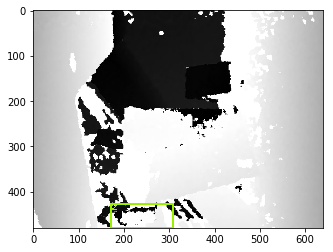

In [5]:
from generator import DataGenerator, BoundBox
# Generators
train_gen = DataGenerator(train_imgs, generator_config)
idx =5

it=train_gen.__getitem__(idx)




In [6]:
with open('out.txt', 'w') as f:
    print >> f, it  # Python 2.x

In [7]:
with open('out_1.txt', 'w') as f:
    for i in it:
        for k in i:
            print >> f, k  # Python 2.x
        
        
